**深度学习**称作端到端的学习, End-To-End Machine Leaning, **从原始数据中获得目标结果**

## 均方误差

In [2]:
# mean squared error
import numpy as np
def mean_square_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

t = [0,   0,    1,   0,   0]
y = [0.1, 0.05, 0.6, 0.1, 0.15 ]
print(mean_square_error(np.array(y), np.array(t)))


t = [1,   0,    0,   0,   0]
y = [0.1, 0.05, 0.6, 0.1, 0.15 ]
print(mean_square_error(np.array(y), np.array(t)))

0.10250000000000002
0.6024999999999999


## 交叉熵误差

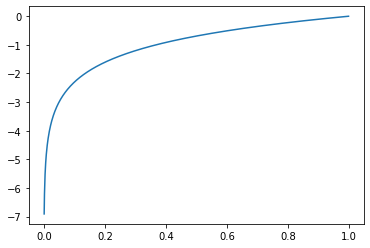

In [3]:
# cross entropy error
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.001, 1, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.show()

In [4]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))
t = [0,   0,    1,   0,   0]
y = [0.1, 0.05, 0.6, 0.1, 0.15 ]
print(cross_entropy_error(np.array(y), np.array(t)))


t = [1,   0,    0,   0,   0]
y = [0.1, 0.05, 0.6, 0.1, 0.15 ]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


## mini batch

In [5]:
import sys, os
sys.path.append('SourceCode')
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [6]:
train_size = x_train.shape[0]
batch_size = 10
print('train_size:%d, batch_size:%d' % (train_size, batch_size))

train_size:60000, batch_size:10


In [7]:
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

[34007  7431 51843 51858 22630 33702 21131 30775  4849 42768]


In [8]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(x_batch.shape, '\n',  t_batch.shape)

(10, 784) 
 (10, 10)


In [9]:
# mini-batch 交叉熵误差
# one hot数据
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size
cross_entropy_error(t_batch, t_batch)

-9.999999505838706e-08

In [10]:
# 非one hot数据
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size
batch_size = 10
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=False)
print(np.arange(batch_size))

[0 1 2 3 4 5 6 7 8 9]


In [11]:
t_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
t_train[np.arange(batch_size)]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

# 数值微分

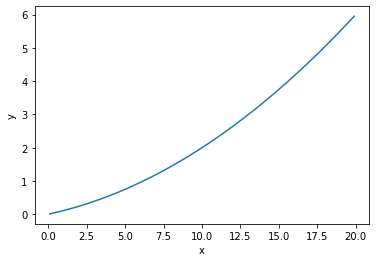

In [13]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)


# derivate is 0.02x
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.1, 20, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

In [14]:
numerical_diff(function_1, 5)

0.1999999999990898

In [15]:
numerical_diff(function_1, 10)

0.2999999999986347

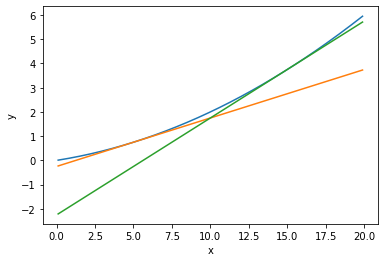

In [16]:
def tangent_line(f, x):
    d = numerical_diff(f, x)    
    y = f(x) - d * x    
    return lambda t: d*t + y
tf = tangent_line(function_1, 5)
y1 = tf(x)
tf2 = tangent_line(function_1, 15)
y2 = tf2(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

In [17]:
# 偏导数
def function_2(x):
    return np.sum(x ** 2)
x = np.array([1, 2])
function_2(x)

5

No handles with labels found to put in legend.


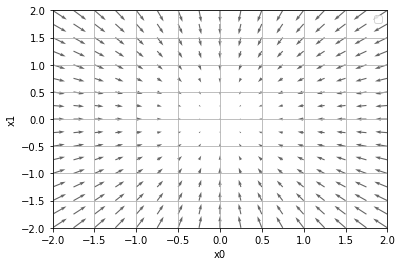

In [18]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

In [26]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)       
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad

def function2(x):
    return np.sum(x ** 2)

numerical_gradient(function2, np.array([3.0 ,4.0]))

array([6., 8.])